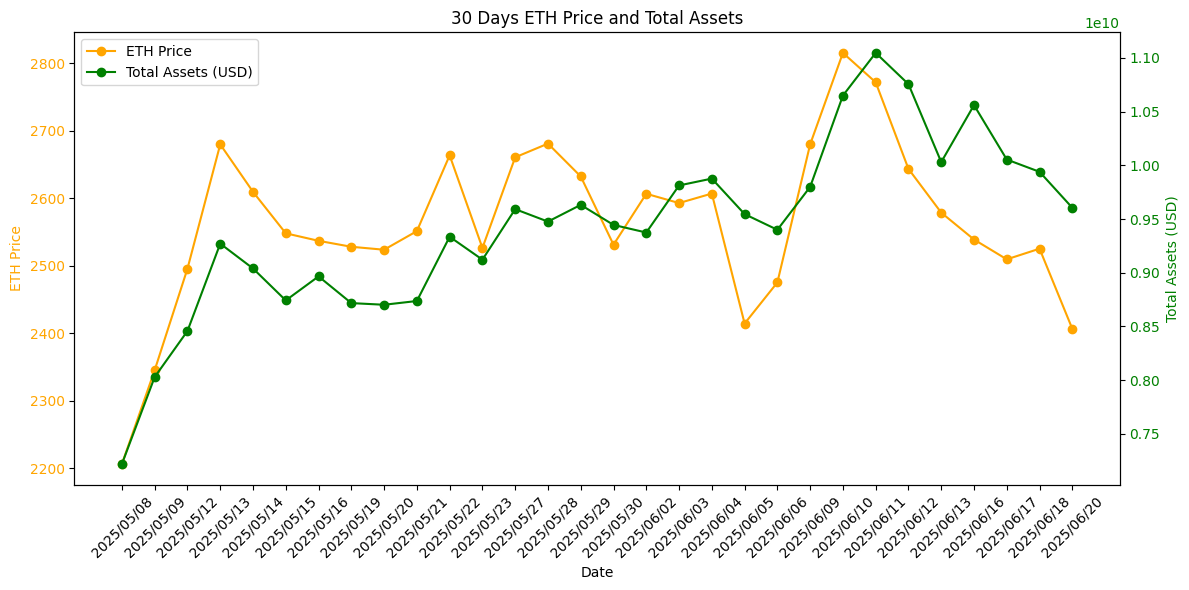

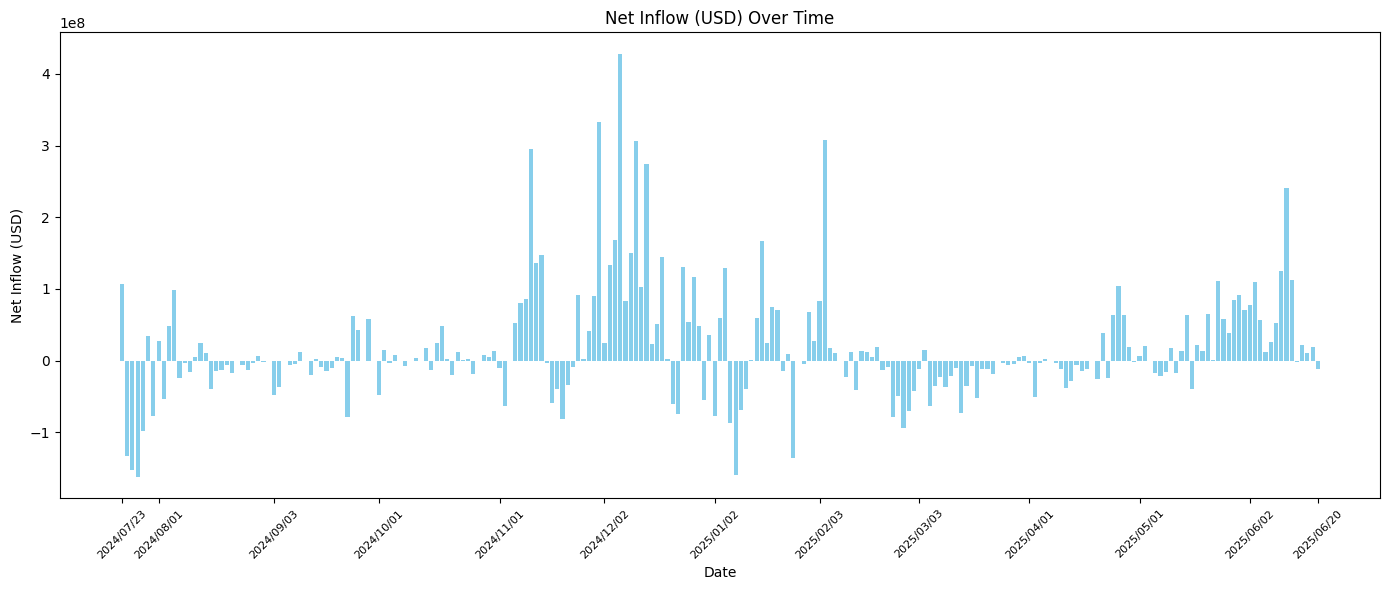

,Date,ETH Price,Total Assets (USD),Net Inflow (USD)
0,2025/06/20,2406.510000,9604777711.160000,-11344356.500000
1,2025/06/18,2525.350000,9939644811.030001,19099818.400000
2,2025/06/17,2509.590000,10054045862.129999,11094708.160000
3,2025/06/16,2538.950000,10561012257.780001,21388845.800000
4,2025/06/13,2578.830000,10030417603.690001,-2175978.350000
5,2025/06/12,2643.700000,10755903328.469999,112362545.600000
6,2025/06/11,2772.110000,11047271605.240000,240292333.860000
7,2025/06/10,2815.730000,10649631125.100000,124926885.560000
8,2025/06/09,2680.070000,9799379228.770000,52711202.700000
9,2025/06/06,2475.340000,9399749986.190001,25222787.520000


Button(button_style='success', description='Refresh Data', style=ButtonStyle())

Button(button_style='info', description='Show Correlation', style=ButtonStyle())

In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

file_path = r'C:\Users\Administrator.DESKTOP-6H09AD4\Downloads\以太坊现货 ETF 历史数据总览 (7).csv'

def highlight_price_change(s):
    colors = []
    for i in range(len(s)):
        if i == 0:
            if s.iloc[i] > s.iloc[i+1]:
                colors.append('color: green; font-weight: bold')
            elif s.iloc[i] < s.iloc[i+1]:
                colors.append('color: red; font-weight: bold')
            else:
                colors.append('')
        else:
            if s.iloc[i] > s.iloc[i-1]:
                colors.append('color: green; font-weight: bold')
            elif s.iloc[i] < s.iloc[i-1]:
                colors.append('color: red; font-weight: bold')
            else:
                colors.append('')
    return colors

refresh_button = widgets.Button(description="Refresh Data", button_style='success')
corr_button = widgets.Button(description="Show Correlation", button_style='info')

def load_and_show(_):
    clear_output(wait=True)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='gbk')
    df['日期'] = pd.to_datetime(df['日期'])
    df = df.sort_values('日期', ascending=False)
    df['Date'] = df['日期'].dt.strftime('%Y/%m/%d')
    df['Net Inflow (USD)'] = df['单日总净流入(美元)'].astype(str).str.replace(',', '').astype(float)
    df['ETH Price'] = df['ETH 价格'].astype(str).str.replace(',', '').astype(float)
    df['Total Assets (USD)'] = df['总资产净值(美元)'].astype(str).str.replace(',', '').astype(float)

    df_30 = df.head(30).copy()
    df_30_plot = df_30.sort_values('Date')
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(df_30_plot['Date'], df_30_plot['ETH Price'], color='orange', marker='o', label='ETH Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('ETH Price', color='orange')
    ax1.tick_params(axis='y', labelcolor='orange')
    plt.xticks(rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(df_30_plot['Date'], df_30_plot['Total Assets (USD)'], color='green', marker='o', label='Total Assets (USD)')
    ax2.set_ylabel('Total Assets (USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.title('30 Days ETH Price and Total Assets')
    fig.tight_layout()
    plt.show()

    # 生成x轴刻度：最新日期+每个月的第一个日期
    df_sorted = df.sort_values('日期')
    month_starts = df_sorted.groupby([df_sorted['日期'].dt.year, df_sorted['日期'].dt.month]).first()
    xticks_dates = list(month_starts['Date'])
    # 确保最新日期在x轴
    if df_sorted['Date'].iloc[-1] not in xticks_dates:
        xticks_dates.append(df_sorted['Date'].iloc[-1])

    # 柱状图
    fig2, ax3 = plt.subplots(figsize=(14, 6))
    ax3.bar(df_sorted['Date'], df_sorted['Net Inflow (USD)'], color='skyblue')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Net Inflow (USD)')
    ax3.set_title('Net Inflow (USD) Over Time')
    ax3.set_xticks(xticks_dates)
    ax3.set_xticklabels(xticks_dates, rotation=45, fontsize=8)
    fig2.tight_layout()
    plt.show()

    styled = df_30[['Date', 'ETH Price', 'Total Assets (USD)', 'Net Inflow (USD)']].style\
        .apply(highlight_price_change, subset=['ETH Price']) \
        .apply(highlight_price_change, subset=['Total Assets (USD)'])
    display(styled)
    display(refresh_button)
    display(corr_button)

def show_corr(_):
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='gbk')
    for col in ['ETH 价格', '总资产净值(美元)', '单日总净流入(美元)']:
        df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    corr = df[['ETH 价格', '总资产净值(美元)', '单日总净流入(美元)']].corr()
    print('Correlation Matrix:')
    display(corr)
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

refresh_button.on_click(load_and_show)
corr_button.on_click(show_corr)

display(refresh_button)
display(corr_button)
load_and_show(None)

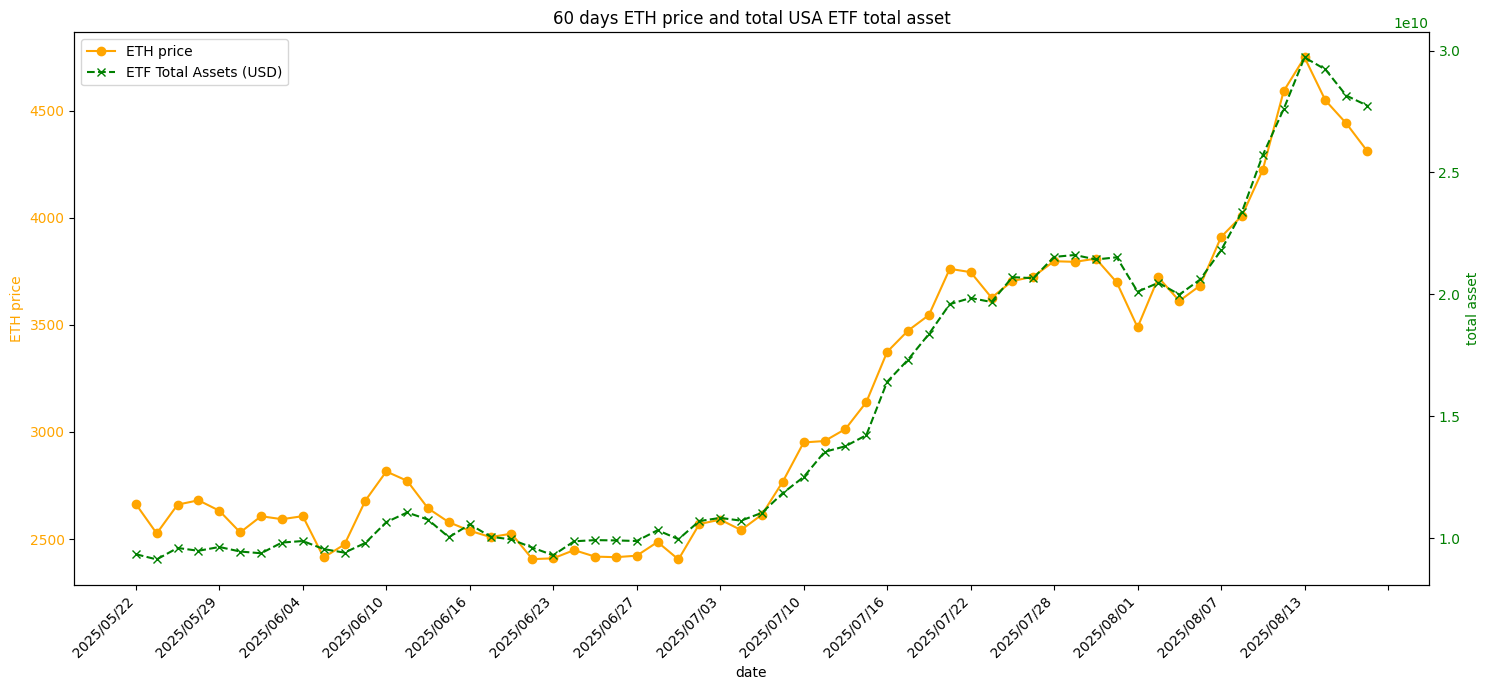

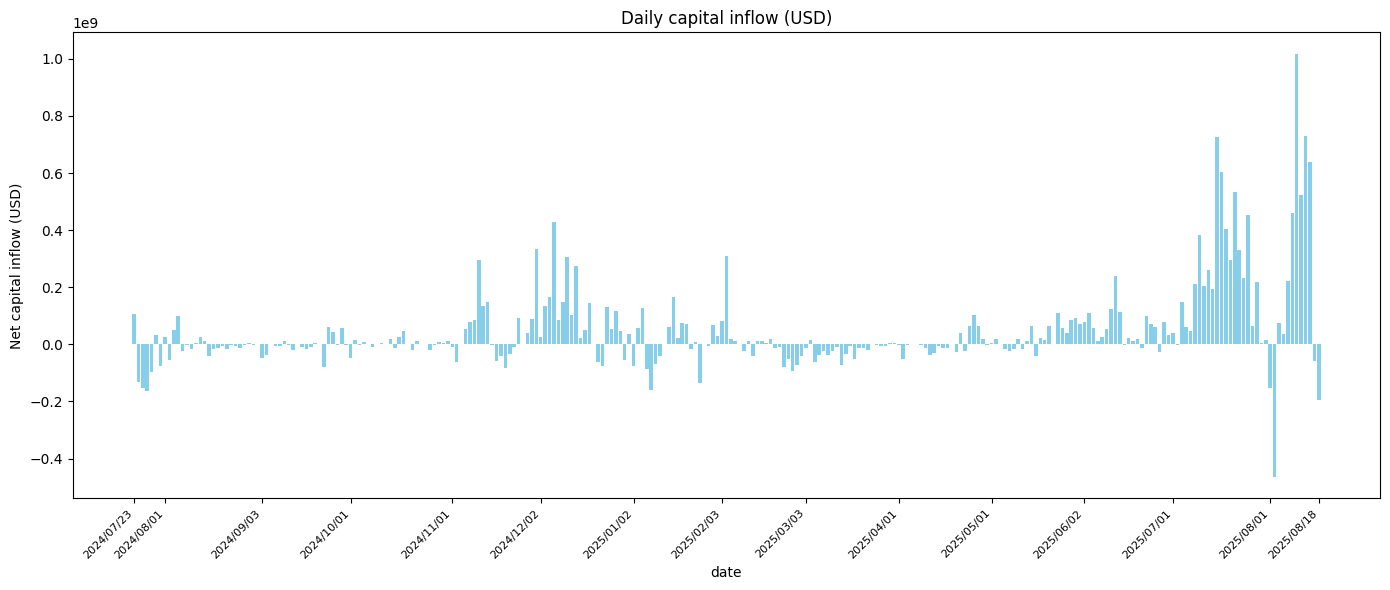

最近60天数据:


,Date,ETH Price,Total Assets (USD),Net Inflow (USD)
0,2025/08/18,4311.420000,27744906574.180000,-196624457.950000
1,2025/08/15,4440.050000,28153250839.119999,-59337134.340000
2,2025/08/14,4547.350000,29224989993.080002,639609479.650000
3,2025/08/13,4747.870000,29718589639.700001,729141673.530000
4,2025/08/12,4590.710000,27600116992.200001,523924255.430000
5,2025/08/11,4223.420000,25711780545.360001,1018730076.450000
6,2025/08/08,4008.960000,23384262272.369999,461206374.160000
7,2025/08/07,3909.960000,21804370119.150002,222340716.830000
8,2025/08/06,3683.360000,20607523318.110001,35124280.340000
9,2025/08/05,3611.690000,19988286180.860001,73222163.440000


Button(button_style='success', description='刷新数据', style=ButtonStyle())

Button(button_style='info', description='显示相关性', style=ButtonStyle())

In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 请确保文件路径正确
file_path = r'C:\Users\Administrator.DESKTOP-6H09AD4\Downloads\以太坊现货 ETF 历史数据总览.csv'

def highlight_price_change(s):
    """根据价格变化高亮单元格颜色"""
    colors = []
    for i in range(len(s)):
        if i == 0:
            if len(s) > 1 and s.iloc[i] > s.iloc[i+1]:
                colors.append('color: green; font-weight: bold')
            elif len(s) > 1 and s.iloc[i] < s.iloc[i+1]:
                colors.append('color: red; font-weight: bold')
            else:
                colors.append('')
        else:
            if s.iloc[i] > s.iloc[i-1]:
                colors.append('color: green; font-weight: bold')
            elif s.iloc[i] < s.iloc[i-1]:
                colors.append('color: red; font-weight: bold')
            else:
                colors.append('')
    return colors

# 创建按钮
refresh_button = widgets.Button(description="刷新数据", button_style='success')
corr_button = widgets.Button(description="显示相关性", button_style='info')

def load_and_show(_):
    """加载数据、清洗数据并显示图表和表格"""
    clear_output(wait=True)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='gbk')
    
    # 数据清洗和预处理
    df['日期'] = pd.to_datetime(df['日期'])
    df = df.sort_values('日期', ascending=False)
    df['Date'] = df['日期'].dt.strftime('%Y/%m/%d')
    df['Net Inflow (USD)'] = df['单日总净流入(美元)'].astype(str).str.replace(',', '').astype(float)
    df['ETH Price'] = df['ETH 价格'].astype(str).str.replace(',', '').astype(float)
    df['Total Assets (USD)'] = df['总资产净值(美元)'].astype(str).str.replace(',', '').astype(float)

    # 准备60天的数据用于绘图
    df_60 = df.head(60).copy()
    df_60_plot = df_60.sort_values('Date')
    
    # 绘制60天 ETH 价格和总资产净值的双轴折线图
    fig, ax1 = plt.subplots(figsize=(15, 7)) # 调整了图形大小以容纳更多数据点
    ax1.plot(df_60_plot['Date'], df_60_plot['ETH Price'], color='orange', marker='o', linestyle='-', label='ETH price')
    ax1.set_xlabel('date')
    ax1.set_ylabel('ETH price', color='orange')
    ax1.tick_params(axis='y', labelcolor='orange')
    plt.xticks(rotation=45, ha="right") # 调整了x轴标签旋转角度
    # 自动选择性地显示x轴刻度，避免重叠
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20)) 


    ax2 = ax1.twinx()
    ax2.plot(df_60_plot['Date'], df_60_plot['Total Assets (USD)'], color='green', marker='x', linestyle='--', label='ETF Total Assets (USD)')
    ax2.set_ylabel('total asset', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.title('60 days ETH price and total USA ETF total asset')
    fig.tight_layout()
    plt.show()

    # 绘制资金净流入柱状图 (所有数据)
    df_sorted = df.sort_values('日期')
    month_starts = df_sorted.groupby([df_sorted['日期'].dt.year, df_sorted['日期'].dt.month]).first()
    xticks_dates = list(month_starts['Date'])
    if df_sorted['Date'].iloc[-1] not in xticks_dates:
        xticks_dates.append(df_sorted['Date'].iloc[-1])

    fig2, ax3 = plt.subplots(figsize=(14, 6))
    ax3.bar(df_sorted['Date'], df_sorted['Net Inflow (USD)'], color='skyblue')
    ax3.set_xlabel('date')
    ax3.set_ylabel('Net capital inflow (USD)')
    ax3.set_title('Daily capital inflow (USD)')
    ax3.set_xticks(xticks_dates)
    ax3.set_xticklabels(xticks_dates, rotation=45, fontsize=8, ha="right")
    fig2.tight_layout()
    plt.show()

    # 显示最近60天的数据表格
    print("最近60天数据:")
    styled = df_60[['Date', 'ETH Price', 'Total Assets (USD)', 'Net Inflow (USD)']].style\
        .apply(highlight_price_change, subset=['ETH Price']) \
        .apply(highlight_price_change, subset=['Total Assets (USD)'])
    display(styled)
    
    # 重新显示按钮
    display(refresh_button)
    display(corr_button)

def show_corr(_):
    """计算并显示相关性矩阵和热力图"""
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='gbk')
    
    for col in ['ETH 价格', '总资产净值(美元)', '单日总净流入(美元)']:
        df[col] = df[col].astype(str).str.replace(',', '').astype(float)
        
    corr = df[['ETH 价格', '总资产净值(美元)', '单日总净流入(美元)']].corr()
    
    print('相关性矩阵:')
    display(corr)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('相关性热力图')
    plt.show()

# 将函数绑定到按钮的点击事件
refresh_button.on_click(load_and_show)
corr_button.on_click(show_corr)

# 初始加载时显示按钮并加载数据
display(refresh_button)
display(corr_button)
load_and_show(None)


In [1]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# 请确保文件路径正确
file_path = r'C:\Users\Administrator.DESKTOP-6H09AD4\Downloads\以太坊现货 ETF 历史数据总览 (5).csv'

def highlight_price_change(s):
    """根据价格变化高亮单元格颜色"""
    colors = []
    for i in range(len(s)):
        if i == 0:
            if len(s) > 1 and s.iloc[i] > s.iloc[i+1]:
                colors.append('color: green; font-weight: bold')
            elif len(s) > 1 and s.iloc[i] < s.iloc[i+1]:
                colors.append('color: red; font-weight: bold')
            else:
                colors.append('')
        else:
            if s.iloc[i] > s.iloc[i-1]:
                colors.append('color: green; font-weight: bold')
            elif s.iloc[i] < s.iloc[i-1]:
                colors.append('color: red; font-weight: bold')
            else:
                colors.append('')
    return colors

# 创建按钮
refresh_button = widgets.Button(description="刷新数据", button_style='success')
corr_button = widgets.Button(description="显示相关性", button_style='info')

def load_and_show(_):
    """加载数据、清洗数据并显示图表和表格"""
    clear_output(wait=True)
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='gbk')
    
    # 数据清洗和预处理
    df['日期'] = pd.to_datetime(df['日期'])
    df = df.sort_values('日期', ascending=False)
    df['Date'] = df['日期'].dt.strftime('%Y/%m/%d')
    df['Net Inflow (USD)'] = df['单日总净流入(美元)'].astype(str).str.replace(',', '').astype(float)
    df['ETH Price'] = df['ETH 价格'].astype(str).str.replace(',', '').astype(float)
    df['Total Assets (USD)'] = df['总资产净值(美元)'].astype(str).str.replace(',', '').astype(float)
    
    # 新增：处理BTC/ETH enter rate
    df['BTC ETF净流入'] = df['BTC ETF净流入'].astype(str).str.replace(',', '').astype(float)
    df['BTC/ETH enter rate'] = df['BTC ETF净流入'] / df['单日总净流入(美元)']

    # 准备60天的数据用于绘图
    df_60 = df.head(60).copy()
    df_60_plot = df_60.sort_values('Date')
    
    # 绘制60天 ETH 价格和总资产净值的双轴折线图
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax1.plot(df_60_plot['Date'], df_60_plot['ETH Price'], color='orange', marker='o', linestyle='-', label='ETH 价格 (美元)')
    ax1.set_xlabel('date')
    ax1.set_ylabel('ETH price', color='orange')
    ax1.tick_params(axis='y', labelcolor='orange')
    plt.xticks(rotation=45, ha="right")
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20)) 

    ax2 = ax1.twinx()
    ax2.plot(df_60_plot['Date'], df_60_plot['Total Assets (USD)'], color='green', marker='x', linestyle='--', label='总资产净值 (美元)')
    ax2.set_ylabel('total asset', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    plt.title('60 days ETH price and total USA ETF total asset')
    fig.tight_layout()
    plt.show()

    # 绘制资金净流入柱状图 (所有数据)
    df_sorted = df.sort_values('日期')
    month_starts = df_sorted.groupby([df_sorted['日期'].dt.year, df_sorted['日期'].dt.month]).first()
    xticks_dates = list(month_starts['Date'])
    if df_sorted['Date'].iloc[-1] not in xticks_dates:
        xticks_dates.append(df_sorted['Date'].iloc[-1])

    fig2, ax3 = plt.subplots(figsize=(14, 6))
    ax3.bar(df_sorted['Date'], df_sorted['Net Inflow (USD)'], color='skyblue')
    ax3.set_xlabel('date')
    ax3.set_ylabel('Net capital inflow (USD)')
    ax3.set_title('Daily capital inflow (USD)')
    ax3.set_xticks(xticks_dates)
    ax3.set_xticklabels(xticks_dates, rotation=45, fontsize=8, ha="right")
    fig2.tight_layout()
    plt.show()

    # 新增：绘制BTC/ETH enter rate折线图
    fig3, ax4 = plt.subplots(figsize=(14, 6))
    ax4.plot(df['Date'], df['BTC/ETH enter rate'], color='purple', marker='o', linestyle='-')
    ax4.set_xlabel('date')
    ax4.set_ylabel('BTC/ETH enter rate')
    ax4.set_title('BTC/ETH enter rate 随时间变化')
    plt.xticks(rotation=45, ha="right")
    fig3.tight_layout()
    plt.show()

    # 显示最近60天的数据表格
    print("最近60天数据:")
    styled = df_60[['Date', 'ETH Price', 'Total Assets (USD)', 'Net Inflow (USD)', 'BTC/ETH enter rate']].style\
        .apply(highlight_price_change, subset=['ETH Price']) \
        .apply(highlight_price_change, subset=['Total Assets (USD)'])
    display(styled)
    
    # 重新显示按钮
    display(refresh_button)
    display(corr_button)

def show_corr(_):
    """计算并显示相关性矩阵和热力图"""
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='gbk')
    
    for col in ['ETH 价格', '总资产净值(美元)', '单日总净流入(美元)']:
        df[col] = df[col].astype(str).str.replace(',', '').astype(float)
        
    corr = df[['ETH 价格', '总资产净值(美元)', '单日总净流入(美元)']].corr()
    
    print('相关性矩阵:')
    display(corr)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('相关性热力图')
    plt.show()

# 将函数绑定到按钮的点击事件
refresh_button.on_click(load_and_show)
corr_button.on_click(show_corr)

# 初始加载时显示按钮并加载数据
display(refresh_button)
display(corr_button)
load_and_show(None)

TypeError: unsupported operand type(s) for /: 'float' and 'str'